In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/content/archive (2).zip")

In [217]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [218]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [125]:
df.shape

(1259, 27)

In [126]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [127]:
df.Country.value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

<Axes: >

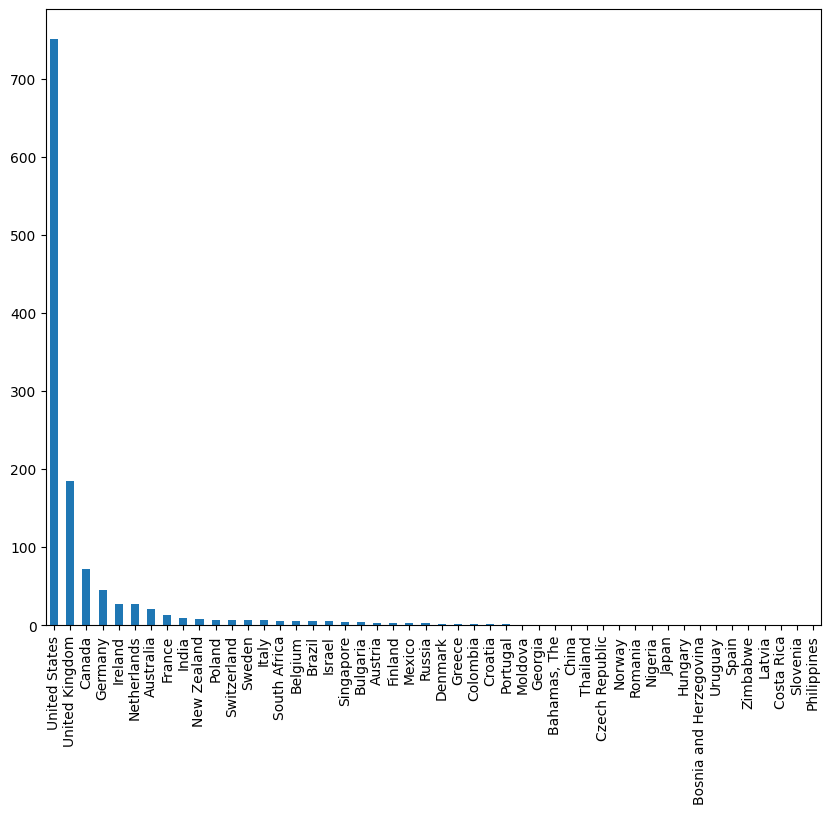

In [8]:
df.Country.value_counts().plot(kind="bar",figsize=(10,8))

In [10]:
df.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [11]:
df.work_interfere.value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [220]:
#Segregating different gender values into Male,Female,Other
# Create a mapping dictionary
gender_mapping = {
    "Male": "Male",
    "male": "Male",
    "M": "Male",
    "m": "Male",
    "Make": "Male",
    "Cis Male": "Male",
    "Man": "Male",
    "Trans woman": "Male",
    "msle": "Male",
    "male leaning androgynous": "Male",
    "Neuter": "Male",
    "cis male": "Male",
    "Male-ish": "Male",
    "maile": "Male",
    "Male (CIS)": "Male",
    "something kinda male?": "Male",
    "Mal": "Male",
    "ostensibly male, unsure what that really means": "Male",
    "Female": "Female",
    "female": "Female",
    "F": "Female",
    "f": "Female",
    "Woman": "Female",
    "Female (trans)": "Female",
    "Female (cis)": "Female",
    "femail": "Female",
    "Cis Man": "Female",
    "Enby": "Female",
    "Agender": "Female",
    "Androgyne": "Female",
    "Cis Female": "Female",
    "Femake": "Female",
    "woman": "Female",
    "queer/she/they": "Other",
    "non-binary": "Other",
    "Nah": "Other",
    "All": "Other",
    "fluid": "Other",
    "Genderqueer": "Other",
    "A little about you": "Other",
    "Malr": "Other",
    "p": "Other",
    "Male": "Other",
    "queer": "Other",
    "Male-ish": "Other",
}

# Replace gender values in your DataFrame
df['Gender'] = df['Gender'].map(gender_mapping)


In [129]:
df.Gender.value_counts()

Other     626
Male      374
Female    250
Name: Gender, dtype: int64

In [221]:
df.Gender.isnull().sum()

9

In [130]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode().iloc[0])

In [131]:
df["state"]=df["state"].fillna(df["state"].mode().iloc[0])

In [222]:
df.self_employed.value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [223]:
df["self_employed"] = df["self_employed"].fillna(df["self_employed"].mode().iloc[0])


In [224]:
df["work_interfere"]=df["work_interfere"].fillna(df["work_interfere"].mode().iloc[0])

In [135]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                           0
self_employed                   0
family_history                  0
treatment                       0
work_interfere                  0
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [225]:
df.drop(df[(df["Age"]>60) | (df["Age"]<18)].index,inplace=True)

In [226]:
new_df=df.iloc[:,1:-1]

In [227]:
new_df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,No,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,IN,No,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Other,Canada,NaN,No,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Other,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Other,United States,TX,No,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [228]:
x=new_df.drop("treatment", axis=1)
y=new_df["treatment"]



In [229]:
x.head()

,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,No,No,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,IN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Other,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Other,United Kingdom,NaN,No,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Other,United States,TX,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [231]:
y.isnull().sum()

0

In [232]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x["Gender"]=le.fit_transform(x["Gender"])
x["Country"]=le.fit_transform(x["Country"])
x["state"]=le.fit_transform(x["state"])
x["self_employed"]=le.fit_transform(x["self_employed"])
x["family_history"]=le.fit_transform(x["family_history"])
x["work_interfere"]=le.fit_transform(x["work_interfere"])
x["no_employees"]=le.fit_transform(x["no_employees"])
x["remote_work"]=le.fit_transform(x["remote_work"])
x["tech_company"]=le.fit_transform(x["tech_company"])
x["benefits"]=le.fit_transform(x["benefits"])
x["wellness_program"]=le.fit_transform(x["wellness_program"])
x["seek_help"]=le.fit_transform(x["seek_help"])
x["anonymity"]=le.fit_transform(x["anonymity"])
x["leave"]=le.fit_transform(x["leave"])
x["mental_health_consequence"]=le.fit_transform(x["mental_health_consequence"])
x["phys_health_consequence"]=le.fit_transform(x["phys_health_consequence"])
x["coworkers"]=le.fit_transform(x["coworkers"])
x["supervisor"]=le.fit_transform(x["supervisor"])
x["mental_health_interview"]=le.fit_transform(x["mental_health_interview"])
x["phys_health_interview"]=le.fit_transform(x["phys_health_interview"])
x["mental_vs_physical"]=le.fit_transform(x["mental_vs_physical"])
x["obs_consequence"]=le.fit_transform(x["obs_consequence"])
x["care_options"]=le.fit_transform(x["care_options"])

In [233]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1247 non-null   int64
 1   Gender                     1247 non-null   int64
 2   Country                    1247 non-null   int64
 3   state                      1247 non-null   int64
 4   self_employed              1247 non-null   int64
 5   family_history             1247 non-null   int64
 6   work_interfere             1247 non-null   int64
 7   no_employees               1247 non-null   int64
 8   remote_work                1247 non-null   int64
 9   tech_company               1247 non-null   int64
 10  benefits                   1247 non-null   int64
 11  care_options               1247 non-null   int64
 12  wellness_program           1247 non-null   int64
 13  seek_help                  1247 non-null   int64
 14  anonymity               

In [169]:
x.head()

,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,44,10,0,0,1,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,44,1,44,11,0,0,2,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,2,6,2,0,0,2,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,31,2,43,2,0,1,1,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,31,2,44,37,0,0,0,1,1,1,...,0,0,1,1,1,2,2,2,0,0


<ipython-input-170-3f305be51b6b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.Age)


<Axes: xlabel='Age', ylabel='Density'>

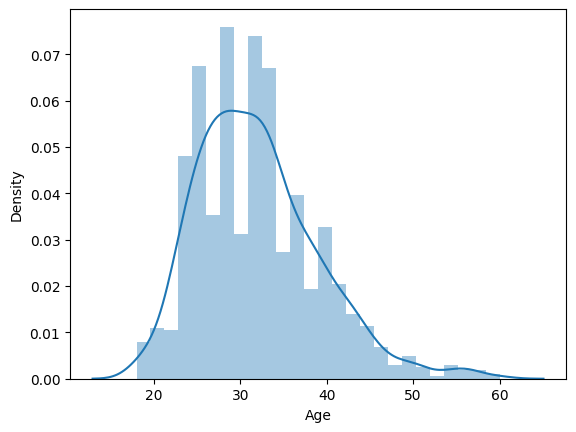

In [170]:
sns.distplot(x.Age)

<Axes: >

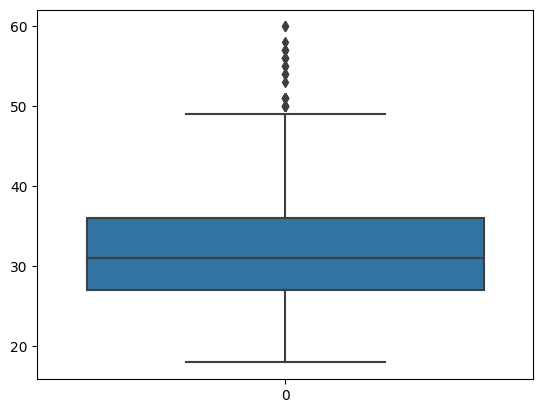

In [171]:
sns.boxplot(x.Age)

In [234]:
q1 = df.Age.quantile(0.25)
q3 = df.Age.quantile(0.75)
IQR = q3 - q1
upper_limit = q3 + 1.5 * IQR
lower_limit = q3 - 1.5 * IQR

# Identify outliers
outliers = df[(df.Age < lower_limit) | (df.Age > upper_limit)]

# Remove outliers
df = df[(df.Age >= lower_limit) & (df.Age <= upper_limit)]

<Axes: >

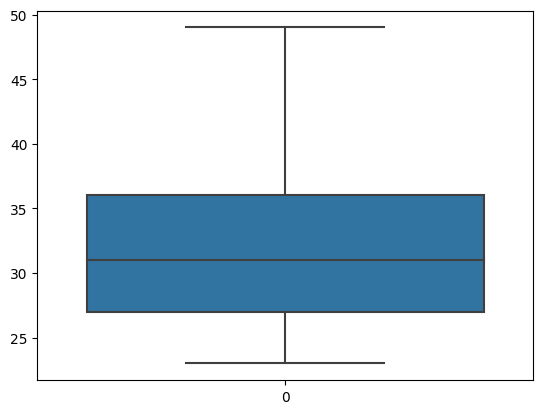

In [173]:
sns.boxplot(df.Age)

In [174]:
x.describe()

,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,...,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000
mean,31.971131,1.303929,36.781075,13.616680,0.112269,0.391339,2.131516,2.790698,0.295108,0.820369,...,0.647955,1.402566,0.850842,0.829190,0.971131,1.096231,0.867682,0.716921,0.810746,0.143545
std,7.052598,0.781924,13.275668,14.713933,0.315824,0.488246,1.162009,1.735840,0.456274,0.384034,...,0.908517,1.505451,0.766607,0.484609,0.619999,0.843468,0.425103,0.723972,0.833361,0.350768
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,41.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,31.000000,2.000000,44.000000,2.000000,0.000000,0.000000,3.000000,3.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,36.000000,2.000000,44.000000,28.000000,0.000000,1.000000,3.000000,4.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000
max,60.000000,2.000000,45.000000,44.000000,1.000000,1.000000,3.000000,5.000000,1.000000,1.000000,...,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [175]:
print(x.shape)
print(y.shape)


(1247, 24)
(1247,)


In [331]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [332]:
x_train.shape,x_test.shape

((997, 24), (250, 24))

In [333]:
pd.DataFrame(x_train.head())

,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
51,33,2,44,38,0,0,3,1,1,1,...,0,0,1,1,1,2,0,0,0,0
726,21,1,16,45,0,0,2,4,1,1,...,0,4,0,0,1,1,1,0,1,0
558,22,2,27,45,0,1,3,4,1,1,...,0,2,1,1,1,2,0,2,2,0
455,36,2,44,18,0,0,3,5,0,1,...,2,2,1,1,2,2,0,2,0,0
888,26,2,19,45,1,0,3,1,0,1,...,2,4,1,1,1,2,1,1,2,0


In [334]:
pd.DataFrame(y_train)

,treatment
51,No
726,No
558,Yes
455,No
888,No
...,...
721,Yes
912,Yes
1106,Yes
236,Yes


#Logistic Regression

In [335]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [336]:
y_lr_pred=lr_model.predict(x_test)

In [337]:
from sklearn.metrics import classification_report,accuracy_score
print(accuracy_score(y_test,y_lr_pred))


0.74


In [274]:
print(classification_report(y_test,y_lr_pred))

              precision    recall  f1-score   support

          No       0.73      0.77      0.75       125
         Yes       0.75      0.71      0.73       125

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.74      0.74      0.74       250



In [275]:
pd.crosstab(y_test,y_lr_pred)

col_0,No,Yes
treatment,,
No,96,29
Yes,36,89


#KNN

In [250]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [251]:
y_knn_pred=knn.predict(x_test)

In [252]:
print(accuracy_score(y_test,y_knn_pred))

0.624


In [253]:
print(classification_report(y_test,y_knn_pred))

              precision    recall  f1-score   support

          No       0.62      0.64      0.63       125
         Yes       0.63      0.61      0.62       125

    accuracy                           0.62       250
   macro avg       0.62      0.62      0.62       250
weighted avg       0.62      0.62      0.62       250



In [254]:
pd.crosstab(y_test,y_knn_pred)

col_0,No,Yes
treatment,,
No,80,45
Yes,49,76


#Descision Tree

In [255]:
from sklearn.tree import DecisionTreeClassifier
Dtree=DecisionTreeClassifier()
Dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [257]:
y_Dtree_pred=Dtree.predict(x_test)

In [258]:
print(accuracy_score(y_Dtree_pred,y_test))

0.696


In [282]:
pd.crosstab(y_Dtree_pred,y_test)

treatment,No,Yes
row_0,,
No,88,39
Yes,37,86


#Rabdom Forest

In [283]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [284]:
y_rfc_pred=rfc.predict(x_test)

In [286]:
print(accuracy_score(y_test,y_rfc_pred))

0.768


In [287]:
pd.crosstab(y_test,y_rfc_pred)

col_0,No,Yes
treatment,,
No,97,28
Yes,30,95


In [288]:
print(classification_report(y_test,y_rfc_pred))

              precision    recall  f1-score   support

          No       0.76      0.78      0.77       125
         Yes       0.77      0.76      0.77       125

    accuracy                           0.77       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.77      0.77      0.77       250



In [291]:
y_train_encoded=le.fit_transform(y_train)
from xgboost.sklearn import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [295]:
y_xgb_pred=xgb.predict(x_test)
y_xgb_pred_str = le.inverse_transform(y_xgb_pred)

In [296]:
print(accuracy_score(y_test,y_xgb_pred_str))

0.72


In [297]:
pd.crosstab(y_test,y_xgb_pred_str)

col_0,No,Yes
treatment,,
No,86,39
Yes,31,94


In [298]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)

AdaBoostClassifier()

In [300]:
y_sdb_pred=adb.predict(x_test)

In [301]:
print(accuracy_score(y_test,y_sdb_pred))

0.748


In [302]:
pd.crosstab(y_test,y_sdb_pred)

col_0,No,Yes
treatment,,
No,95,30
Yes,33,92


#Best model

In [321]:
from sklearn.ensemble import RandomForestClassifier
RandomForest=RandomForestClassifier(random_state=49)
RandomForest.fit(x_train,y_train)

RandomForestClassifier(random_state=49)

In [322]:
RandomForest_pred=RandomForest.predict(x_test)

In [323]:
print(accuracy_score(y_test,RandomForest_pred))

0.76


In [346]:
from sklearn.model_selection import RandomizedSearchCV
params_rfc = {
    'n_estimators': [int(x) for x in np.linspace(start=1, stop=50, num=15)],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


# Create a RandomForestClassifier instance
rfc = RandomForestClassifier(random_state=49)

# Create a RandomizedSearchCV instance
rfc_random = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=params_rfc,
    n_iter=50,
    cv=5,
    n_jobs=-1
)

In [347]:
params_rfc

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'max_depth': [None, 10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [348]:
rfc_random.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=49),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]})

In [349]:
y_pred_rfc=rfc_random.predict(x_test)

In [351]:
print(accuracy_score(y_test,y_pred_rfc))

0.76


In [352]:
abc_tuned = AdaBoostClassifier(random_state=49, n_estimators=11, learning_rate=1.02)
abc_tuned.fit(x_train, y_train)
pred_abc_tuned = abc_tuned.predict(x_test)
accuracy = accuracy_score(y_test, pred_abc_tuned)
print('Accuracy of AdaBoost (tuned) =', accuracy)


Accuracy of AdaBoost (tuned) = 0.736


In [353]:
import pickle
pickle.dump(RandomForest,open("model.pkl","wb"))

In [1]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Load your RandomForest model
model = RandomForestClassifier()  # Make sure to use the same model instance or load it from the saved file
model.fit(X_train, y_train)  # Train the model on your training data

# Save the model with the current scikit-learn version
with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)


ModuleNotFoundError: No module named 'sklearn'